In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Create the Dataset
df = pd.DataFrame({
    "campaign_id": [1, 2, 3, 4, 5],
    "campaign_name": ["Summer Sale", "Black Friday", None, "Retargeting", "Holiday Promo"],
    "impressions": [50000, None, 70000, 45000, 90000],
    "clicks": [2500, 9000, 3500, None, 6000],
    "conversions": [120, 500, None, 70, 300],
    "ad_spend": [800, 3000, None, 500, 2100],
    "revenue": [2000, 9000, 3500, None, 6000]
})



In [7]:
#Inspet the Data
print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())

   campaign_id  campaign_name  impressions  clicks  conversions  ad_spend  \
0            1    Summer Sale      50000.0  2500.0        120.0     800.0   
1            2   Black Friday          NaN  9000.0        500.0    3000.0   
2            3           None      70000.0  3500.0          NaN       NaN   
3            4    Retargeting      45000.0     NaN         70.0     500.0   
4            5  Holiday Promo      90000.0  6000.0        300.0    2100.0   

   revenue  
0   2000.0  
1   9000.0  
2   3500.0  
3      NaN  
4   6000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    5 non-null      int64  
 1   campaign_name  4 non-null      object 
 2   impressions    4 non-null      float64
 3   clicks         4 non-null      float64
 4   conversions    4 non-null      float64
 5   ad_spend       4 non-null      float64
 6   re

In [9]:
#Inspect Missing Data

#Fill missing campaign_name
df['campaign_name'] = df['campaign_name'].fillna('unknown')

#Fill missing impressions
df['impressions'] = df['impressions'].fillna(df['impressions'].mean())

#Fill missing clicks
df['clicks'] = df['clicks'].fillna(df['clicks'].mean())

#Fill missing conversions
df['conversions'] = df['conversions'].fillna(df['conversions'].mean())

#Fill missing ad_spend
df['ad_spend'] = df['ad_spend'].fillna(df['ad_spend'].mean())

#Fill missing revenue
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())

print(df.isnull().sum())


campaign_id      0
campaign_name    0
impressions      0
clicks           0
conversions      0
ad_spend         0
revenue          0
dtype: int64


In [12]:
#Create Marketing Metrics (KPIs)

#CTR (click-through rate)
df['CTR'] = df['clicks'] / df['impressions']

#CVR (conversion rate)
df['CVR'] = df['conversions'] / df['clicks']

#CPC (cost per click)
df['CPC'] = df['ad_spend'] / df['clicks']

#ROAS (return on ad spend)
df['ROAS'] = df['revenue'] / df['ad_spend']

#CPA (cost per acquisition)
df['CPA'] = df['ad_spend'] / df['conversions']



In [14]:
#Analyze Campaign Performance

#Best ROAs
print(df.sort_values("ROAS", ascending=False).head(1))

#Best CVS
print(df.sort_values('CVR', ascending=False).head(1))

#Lowest CPC
print(df.sort_values('CPC').head(1))


   campaign_id campaign_name  impressions  clicks  conversions  ad_spend  \
3            4   Retargeting      45000.0  5250.0         70.0     500.0   

   revenue       CTR       CVR       CPC       CPA   ROAS  
3   5125.0  0.116667  0.013333  0.095238  7.142857  10.25  
   campaign_id campaign_name  impressions  clicks  conversions  ad_spend  \
2            3       unknown      70000.0  3500.0        247.5    1600.0   

   revenue   CTR       CVR       CPC       CPA    ROAS  
2   3500.0  0.05  0.070714  0.457143  6.464646  2.1875  
   campaign_id campaign_name  impressions  clicks  conversions  ad_spend  \
3            4   Retargeting      45000.0  5250.0         70.0     500.0   

   revenue       CTR       CVR       CPC       CPA   ROAS  
3   5125.0  0.116667  0.013333  0.095238  7.142857  10.25  


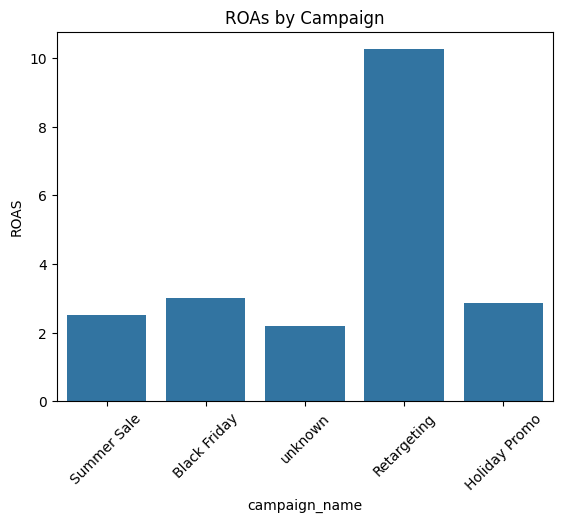

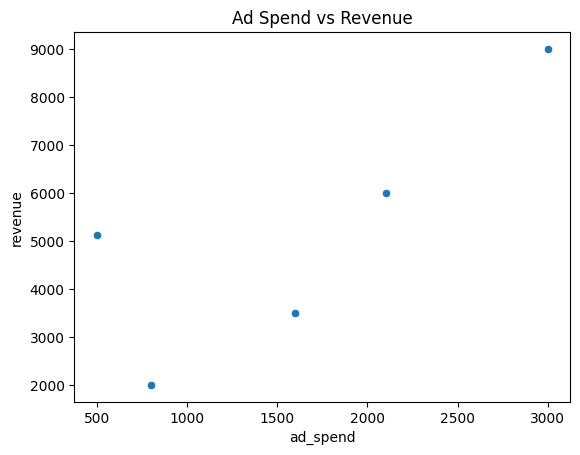

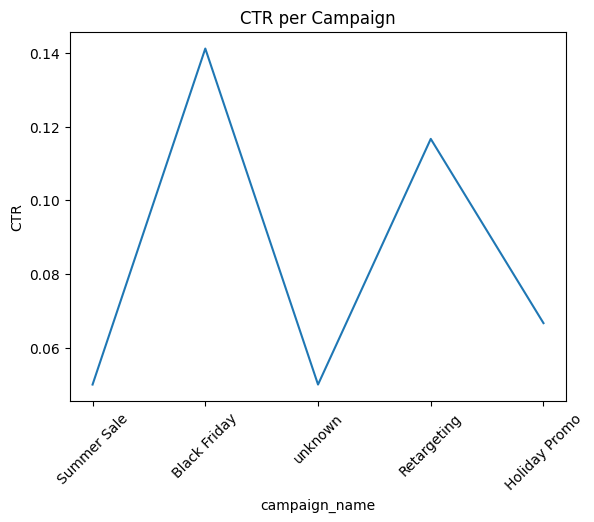

In [17]:
#Visualizations

#ROAs by Campaign
sns.barplot(x=df['campaign_name'], y=df['ROAS'])
plt.xticks(rotation=45)
plt.title('ROAs by Campaign')
plt.show()

#Ad Spend vs Revenue
sns.scatterplot(x=df['ad_spend'], y=df['revenue'])
plt.title('Ad Spend vs Revenue')
plt.show()

#CTR per Campaign
sns.lineplot(x=df['campaign_name'], y=df['CTR'])
plt.xticks(rotation=45)
plt.title('CTR per Campaign')
plt.show()

In [18]:
#Export Cleaned Data
df.to_csv('cleaned_marketing_campaigns.csv', index=False)